In [64]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as pl
import numpy as np
from pgmpy.inference import VariableElimination

In [41]:
% matplotlib inline

<pre>

Tay-Sachs disease (allele t, recessive)
0: TT, 1: Tt, 2: tt
            
P(IG):
+----------+----------+-----------+-----------+
|    IG    |     0    |     1     |      2    |
+----------+----------+-----------+-----------+
|          |    0.6   |    0.35   |    0.05   |
+----------+----------+-----------+-----------+

P(RG):
+----------+----------+-----------+-----------+
|    RG    |     0    |     1     |      2    |
+----------+----------+-----------+-----------+
|          |    0.6   |    0.35   |    0.05   |
+----------+----------+-----------+-----------+

P(IP | IG ):
+----------+----------+-----------+-----------+
|   IG     |     0    |     1     |      2    |
+----------+----------+-----------+-----------+
|  IP = 0  |     1    |     1     |     0     |
+----------+----------+-----------+-----------+
|  IP = 1  |     0    |     0     |     1     |
+----------+----------+-----------+-----------+

P(RP | RG ):
+----------+----------+-----------+-----------+
|   RG     |     0    |     1     |      2    |
+----------+----------+-----------+-----------+
|  RP = 0  |     1    |     1     |     0     |
+----------+----------+-----------+-----------+
|  RP = 1  |     0    |     0     |     1     |
+----------+----------+-----------+-----------+

P(JG | IG, RG):
+------+------+------+------+------+------+------+------+------+------+
|  IG  |          0         |          1         |          2         |
+------+------+------+------+------+------+------+------+------+------+
|  RG  |   0  |   1  |   2  |   0  |   1  |   2  |   0  |   1  |   2  |
+------+------+------+------+------+------+------+------+------+------+
|  J=0 |  1.0 | 0.5  | 0.0  |  0.5 | 0.25 |  0.0 |  0.0 |  0.0 |  0.0 |
+------+------+------+------+------+------+------+------+------+------+
|  J=1 |  0.0 | 0.5  | 1.0  |  0.5 | 0.50 |  0.5 |  1.0 | 0.5  |  0.0 |
+------+------+------+------+------+------+------+------+------+------+
|  J=2 |  0.0 |  0.0 |  0.0 |  0.0 | 0.25 |  0.5 |  0.0 |  0.5 |  1.0 |
+------+------+------+------+------+------+------+------+------+------+

P(JP | JG ):
+----------+----------+-----------+-----------+
|   JG     |     0    |     1     |      2    |
+----------+----------+-----------+-----------+
|  JP = 0  |     1    |     1     |     0     |
+----------+----------+-----------+-----------+
|  JP = 1  |     0    |     0     |     1     |
+----------+----------+-----------+-----------+

</pre>

In [2]:
model=BayesianModel()

In [23]:
nodes = ['Ira_gtyp','Rob_gtyp','Rob_ptyp','Ira_ptyp','Jms_gtyp',
                     'Jms_ptyp']

model.add_nodes_from(nodes)

In [24]:
model.add_edges_from([('Ira_gtyp','Ira_ptyp'),('Ira_gtyp','Jms_gtyp'),
                     ('Rob_gtyp','Rob_ptyp'),('Rob_gtyp','Jms_gtyp'),
                     ('Jms_gtyp','Jms_ptyp')])

In [25]:
model.edges()

[('Jms_gtyp', 'Jms_ptyp'),
 ('Rob_gtyp', 'Jms_gtyp'),
 ('Rob_gtyp', 'Rob_ptyp'),
 ('Ira_gtyp', 'Jms_gtyp'),
 ('Ira_gtyp', 'Ira_ptyp')]

In [28]:
model.nodes()

['Jms_gtyp', 'Rob_ptyp', 'Rob_gtyp', 'Ira_ptyp', 'Ira_gtyp', 'Jms_ptyp']

In [46]:
positions={'Ira_gtyp': np.array([0.35, 0.6]),
          'Ira_ptyp': np.array([0.15, 0.5]),
          'Rob_gtyp': np.array([0.65, .6]),
          'Rob_ptyp': np.array([0.85, 0.5]),
          'Jms_gtyp': np.array([0.5, 0.45]),
          'Jms_ptyp': np.array([0.5, 0.3])}

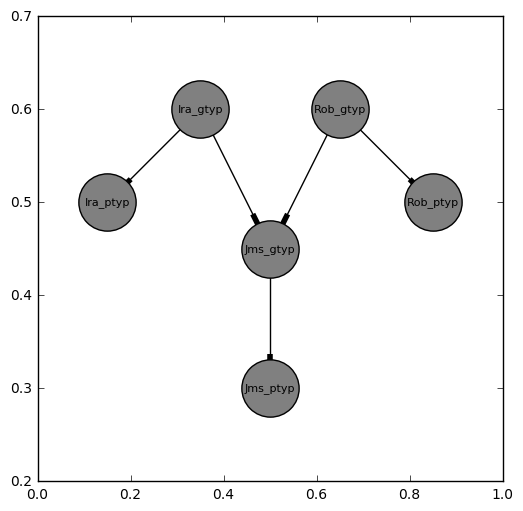

In [48]:
f = pl.figure(figsize=(6,6))
ax = f.add_subplot(111)
nx.draw_networkx(model,pos=positions,node_size=1700, ax=ax, node_color='gray', font_size=8)

In [55]:
# Mendelian inheritance
mend_cpd_Ira_gtype = TabularCPD('Ira_gtyp', 3, [[0.6, 0.35, 0.05]])
mend_cpd_Rob_gtype = TabularCPD('Rob_gtyp', 3, [[0.6, 0.35, 0.05]])
mend_cpd_Rob_ptype = TabularCPD('Rob_ptyp', 2, [[1, 1, 0], [0, 0, 1]],
                                evidence=['Rob_gtyp'], evidence_card=[3])
mend_cpd_Ira_ptype = TabularCPD('Ira_ptyp', 2, [[1, 1, 0], [0, 0, 1]],
                                evidence=['Ira_gtyp'], evidence_card=[3])

In [59]:
mend_cpd_Jms_gtype = TabularCPD('Jms_gtyp', 3, [[1.0, 0.5, 0.0, 0.5, 0.25, 0.0, 0.0, 0.0, 0.0],
                                                [0.0, 0.5, 1.0, 0.5, 0.50, 0.5, 1.0, 0.5, 0.0],
                                                [0.0, 0.0, 0.0, 0.0, 0.25, 0.5, 0.0, 0.5, 1.0]],
                               evidence=['Ira_gtyp', 'Rob_gtyp'], evidence_card=[3, 3])

In [60]:
mend_cpd_Jms_ptype = TabularCPD('Jms_ptyp', 2, [[1, 1, 0], [0, 0, 1]],
                                 evidence=['Jms_gtyp'], evidence_card=[3])

In [61]:
model.add_cpds(mend_cpd_Ira_gtype, mend_cpd_Rob_gtype, mend_cpd_Jms_gtype, 
               mend_cpd_Ira_ptype, mend_cpd_Rob_ptype, mend_cpd_Jms_ptype)

In [62]:
model.check_model()

True

In [63]:
model.get_cpds()

[<TabularCPD representing P(Ira_gtyp:3) at 0x7fb24dffc7b8>,
 <TabularCPD representing P(Rob_gtyp:3) at 0x7fb24dffc5f8>,
 <TabularCPD representing P(Jms_gtyp:3 | Ira_gtyp:3, Rob_gtyp:3) at 0x7fb24e07ecf8>,
 <TabularCPD representing P(Ira_ptyp:2 | Ira_gtyp:3) at 0x7fb24dedf438>,
 <TabularCPD representing P(Rob_ptyp:2 | Rob_gtyp:3) at 0x7fb24dedf940>,
 <TabularCPD representing P(Jms_ptyp:2 | Jms_gtyp:3) at 0x7fb24dbea748>]

In [65]:
infer = VariableElimination(model)

In [68]:
posterior_p = infer.query(['Jms_gtyp'], evidence={'Ira_ptyp': 0, 'Rob_ptyp': 1})

In [70]:
print(posterior_p['Jms_gtyp'])

╒════════════╤═════════════════╕
│ Jms_gtyp   │   phi(Jms_gtyp) │
╞════════════╪═════════════════╡
│ Jms_gtyp_0 │          0.0000 │
├────────────┼─────────────────┤
│ Jms_gtyp_1 │          0.8158 │
├────────────┼─────────────────┤
│ Jms_gtyp_2 │          0.1842 │
╘════════════╧═════════════════╛


In [71]:
posterior_p_evidential = infer.query(['Rob_ptyp','Ira_ptyp'], evidence={'Jms_ptyp':1})

In [74]:
print(posterior_p_evidential['Rob_ptyp'])
print(posterior_p_evidential['Ira_ptyp'])

╒════════════╤═════════════════╕
│ Rob_ptyp   │   phi(Rob_ptyp) │
╞════════════╪═════════════════╡
│ Rob_ptyp_0 │          0.7778 │
├────────────┼─────────────────┤
│ Rob_ptyp_1 │          0.2222 │
╘════════════╧═════════════════╛
╒════════════╤═════════════════╕
│ Ira_ptyp   │   phi(Ira_ptyp) │
╞════════════╪═════════════════╡
│ Ira_ptyp_0 │          0.7778 │
├────────────┼─────────────────┤
│ Ira_ptyp_1 │          0.2222 │
╘════════════╧═════════════════╛


In [75]:
posterior_p_evidential = infer.query(['Rob_gtyp','Ira_gtyp'], evidence={'Jms_ptyp':1})

In [76]:
print(posterior_p_evidential['Rob_gtyp'])
print(posterior_p_evidential['Ira_gtyp'])

╒════════════╤═════════════════╕
│ Rob_gtyp   │   phi(Rob_gtyp) │
╞════════════╪═════════════════╡
│ Rob_gtyp_0 │          0.0000 │
├────────────┼─────────────────┤
│ Rob_gtyp_1 │          0.7778 │
├────────────┼─────────────────┤
│ Rob_gtyp_2 │          0.2222 │
╘════════════╧═════════════════╛
╒════════════╤═════════════════╕
│ Ira_gtyp   │   phi(Ira_gtyp) │
╞════════════╪═════════════════╡
│ Ira_gtyp_0 │          0.0000 │
├────────────┼─────────────────┤
│ Ira_gtyp_1 │          0.7778 │
├────────────┼─────────────────┤
│ Ira_gtyp_2 │          0.2222 │
╘════════════╧═════════════════╛
